In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")

data_rename = data.rename(columns={"Turbidity (NTU)": "Turbidity", "DO (mg/L)": "DO_mg/L", "Temperature (°C)": "Temperature_C", "Ammonium Ion": "Ammonium_Ion", "Amount (mg/L)": "Amount"})
data_finalized = data_rename.drop(["DO_mg/L", "Tds", "Ammonium_Ion", "Nitrate"], axis = 1)
data_finalized = data_finalized.drop(data_finalized.index[14:18])
data_finalized = data_finalized.drop(data_finalized.index[[1, 5, 8, 9, 13]])
data_finalized = data_finalized.reset_index(drop = True)
scaler = StandardScaler()
contaminant_amount = data_finalized[["Contaminant", "Amount"]].copy()
data_finalized = scaler.fit_transform(data_finalized[["pH", "Conductivity", "Turbidity", "Temperature_C"]])
data_scaled = pd.DataFrame(data_finalized, columns = ["pH", "Conductivity", "Turbidity", "Temperature_C"])
data_scaled = pd.concat([contaminant_amount.reset_index(drop=True), data_scaled], axis = 1)
data_scaled = data_scaled.drop(data_scaled.index[[9]])
print(data_scaled)

                  Contaminant Amount        pH  Conductivity  Turbidity  \
0                       Water    NaN -0.378356      0.041692  -1.169309   
1                        Sand    375  0.092577     -0.678749  -0.737097   
2                        Sand    875  0.708412     -0.866364  -0.452748   
3                        Sand  1,500  1.360472     -1.129024   0.189882   
4                     NB Fert      5  0.599735      0.236812  -0.799654   
5                     NB Fert     10  0.998216      2.285565  -0.484026   
6  Organic Materials (Leaves)    100 -0.487033      0.597032   0.098890   
7  Organic Materials (Leaves)    500 -0.849289      0.371894   1.264724   
8  Organic Materials (Leaves)   2000 -2.044733     -0.858859   2.089338   

   Temperature_C  
0      -0.400162  
1      -0.151786  
2       0.344967  
3       1.462660  
4       1.214284  
5       0.965908  
6      -0.772726  
7      -1.269479  
8      -1.393667  


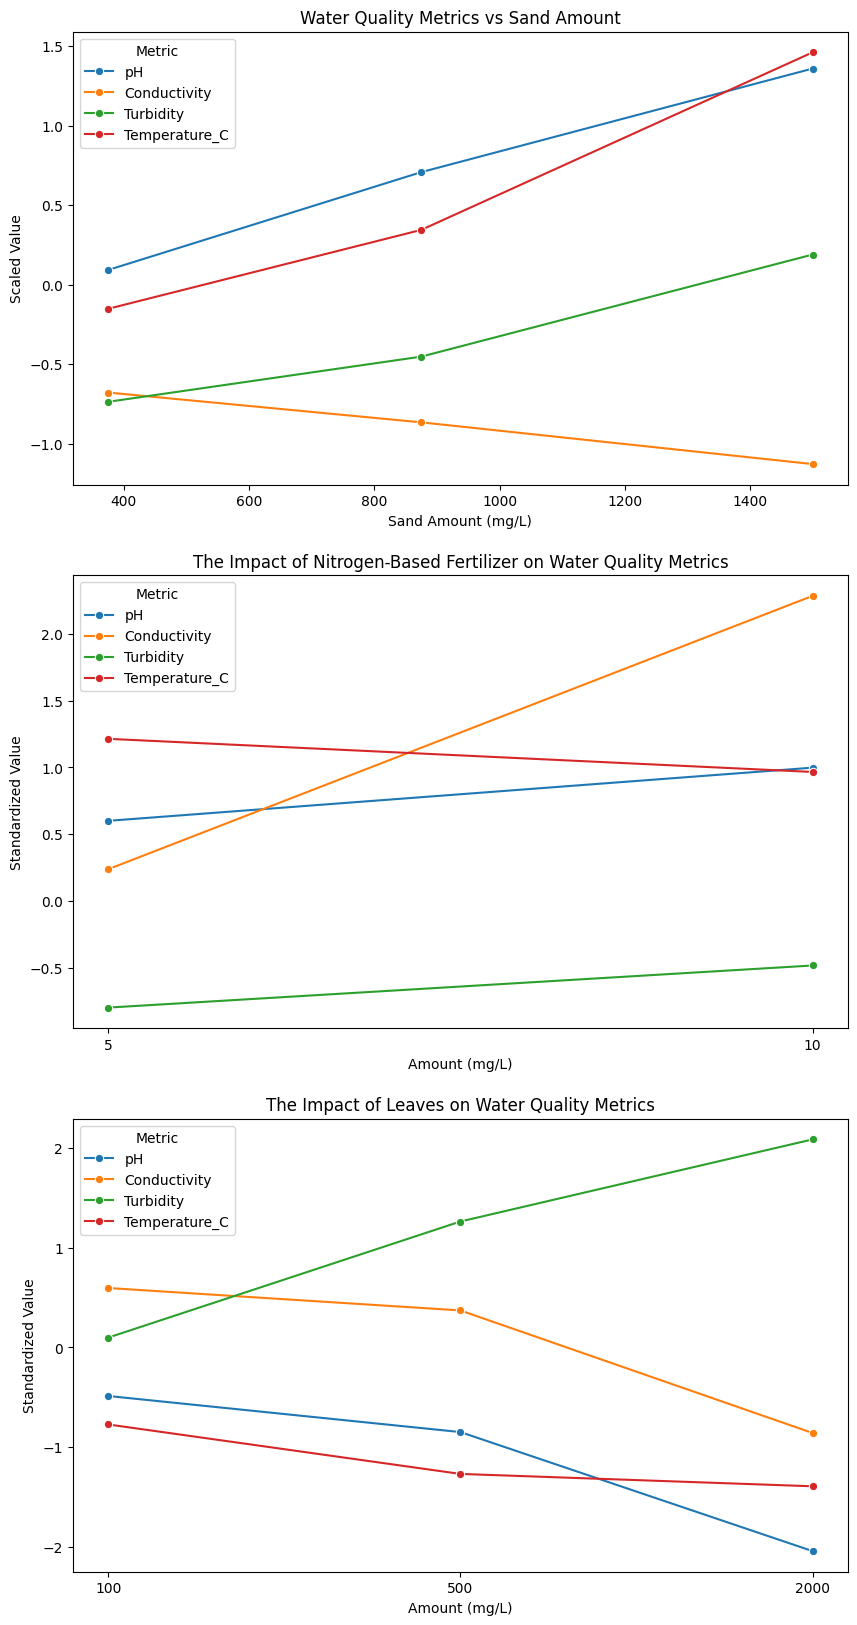

In [34]:

sand_data = data_scaled[data_scaled["Contaminant"] == "Sand"].copy()

sand_data = sand_data.sort_values("Amount")
sand_data["Amount"] = sand_data["Amount"].replace(",", "", regex=True).astype(float)
sand_melted = sand_data.melt(
    id_vars=["Contaminant", "Amount"],
    value_vars=["pH", "Conductivity", "Turbidity", "Temperature_C"],
    var_name="Metric",
    value_name="Value"
)
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
sns.lineplot(data=sand_melted, x="Amount", y="Value", hue="Metric", marker="o")
plt.title("Water Quality Metrics vs Sand Amount")
plt.xlabel("Sand Amount (mg/L)")
plt.ylabel("Scaled Value")
plt.legend(title="Metric")


fertilizer_data = data_scaled[data_scaled["Contaminant"] == "NB Fert"].copy()
plt.subplot(3, 1, 2)
fertilizer_data_melted = fertilizer_data.melt(id_vars = ["Contaminant", "Amount"], value_vars = ["pH", "Conductivity", "Turbidity", "Temperature_C"], var_name = "Metric", value_name = "Value")

sns.lineplot(data = fertilizer_data_melted, x = "Amount", y = "Value", marker = "o", hue = "Metric")
plt.xlabel("Amount (mg/L)")
plt.ylabel("Standardized Value")
plt.title("The Impact of Nitrogen-Based Fertilizer on Water Quality Metrics")


organic_data = data_scaled[data_scaled["Contaminant"] == "Organic Materials (Leaves)"].copy()
plt.subplot(3, 1, 3)
organic_data_melted = organic_data.melt(id_vars = ["Contaminant", "Amount"], value_vars = ["pH", "Conductivity", "Turbidity", "Temperature_C"], var_name = "Metric", value_name = "Value")

sns.lineplot(data = organic_data_melted, x = "Amount", y = "Value", marker = "o", hue = "Metric")
plt.xlabel("Amount (mg/L)")
plt.ylabel("Standardized Value")
plt.title("The Impact of Leaves on Water Quality Metrics")
plt.show()